## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

### Prepare
Check environment. Install packages if in Colab.


In [ ]:
%load_ext autoreload
%autoreload 2

: 

In [2]:
import pandas as pd

In [3]:
metadata = pd.read_pickle(
    f"/gpfs/data/huo-lab/Image/annawoodard/maicara/data/interim/mammo_v10/series_metadata.pkl"
)

In [8]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.4.5  # 0.3.2 does not work in Colab
    !git clone https://github.com/facebookresearch/mae.git
    sys.path.append('./mae')
else:
    sys.path.append('..')
import models_mae

from chimec import ChiMECSSLDataset
from maicara.data.chexpert import CheXpertSSLDataset
from maicara.data.constants import CHIMEC_MEAN, CHIMEC_STD, CHEXPERT_MEAN, CHEXPERT_STD

### Define utils

In [7]:
# define the utils

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title='', chimec=True, mask_ratio=0.75):
    # image is [H, W, 3] for RGB or [H, W, 1] for grayscale
    assert image.shape[2] in [1, 3]
    if chimec:
        plt.imshow(image)
    else:
        plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return


def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

def run_one_image(img, model, chimec=True, mask_ratio=0.75):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=mask_ratio)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    channels = img.shape[2]
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 * channels)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original", chimec)

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked", chimec)

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction", chimec)

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible", chimec)

    plt.show()

### Load an image

In [ ]:
dataset = ChiMECSSLDataset()
# dataset = CheXpertSSLDataset()

loaded 223414 CheXpert exams


/gpfs/data/huo-lab/Image/annawoodard/miniconda3/envs/maicara/lib/python3.8/site-packages/torchvision/transforms/transforms.py:852: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [13]:
breast = dataset[0].T

In [11]:
# chkpt_dir = '/gpfs/data/huo-lab/Image/annawoodard/mae/jobs/35/checkpoint-346.pth'
chkpt_dir = '/gpfs/data/huo-lab/Image/annawoodard/mae/pretraining_experiments/2022_03_29_16_51/jqhxq/checkpoint-34.pth'
model_mae_grayscale = prepare_model(chkpt_dir, 'mae_vit_large_patch16_grayscale')
print('Model loaded.')

<All keys matched successfully>
Model loaded.


MAE with pixel reconstruction:


/tmp/ipykernel_53064/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


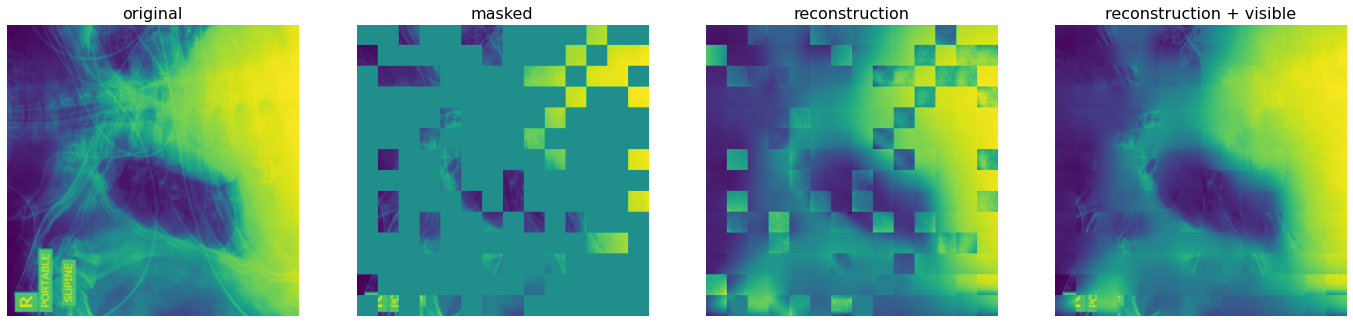

In [14]:
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


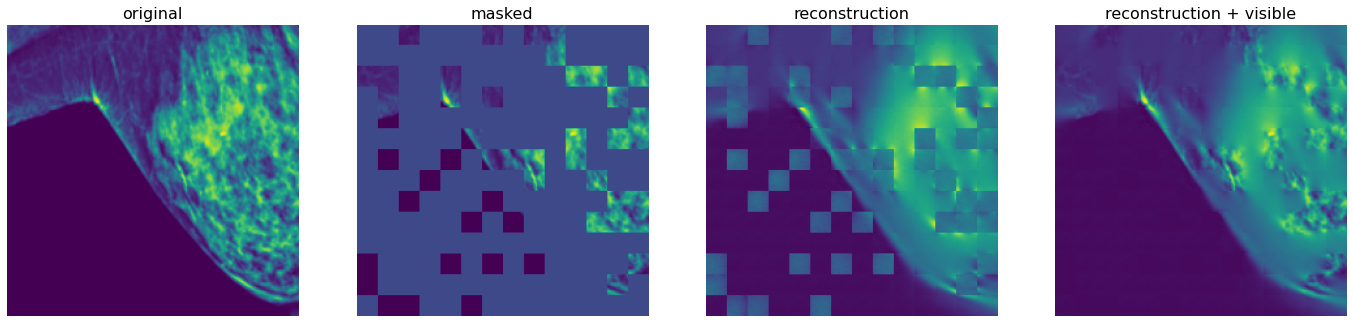

In [22]:
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


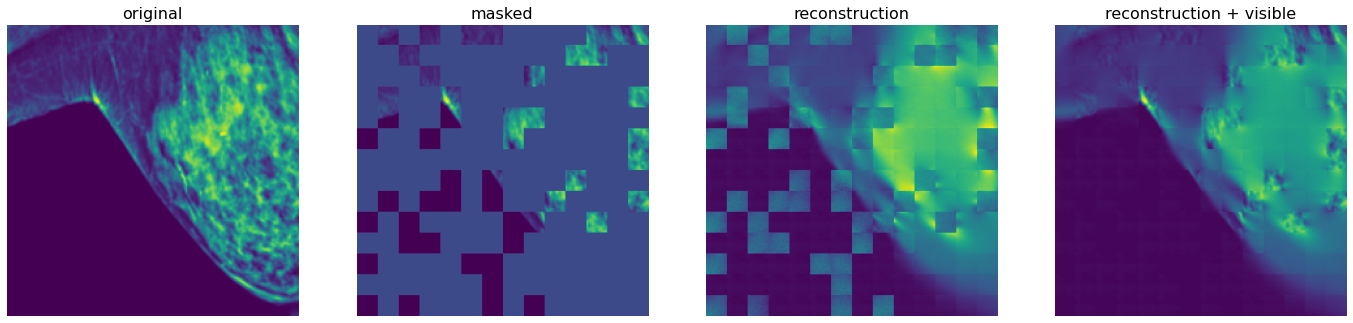

In [20]:
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


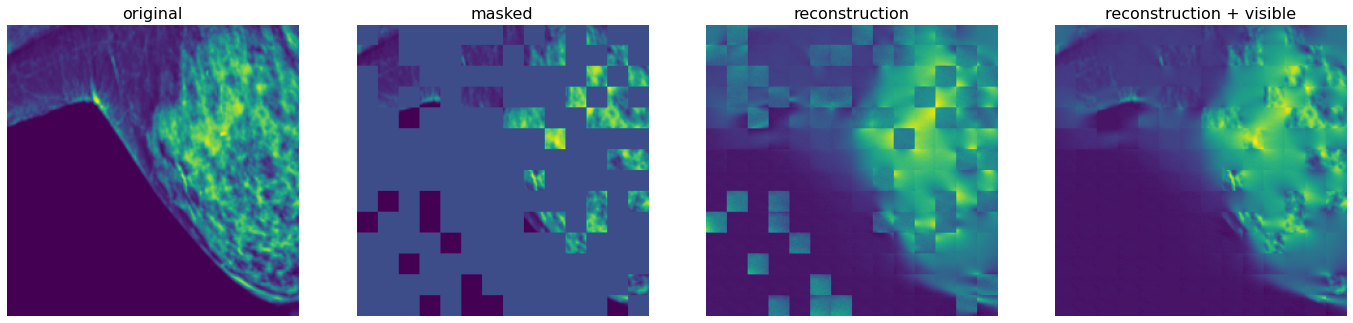

In [16]:
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


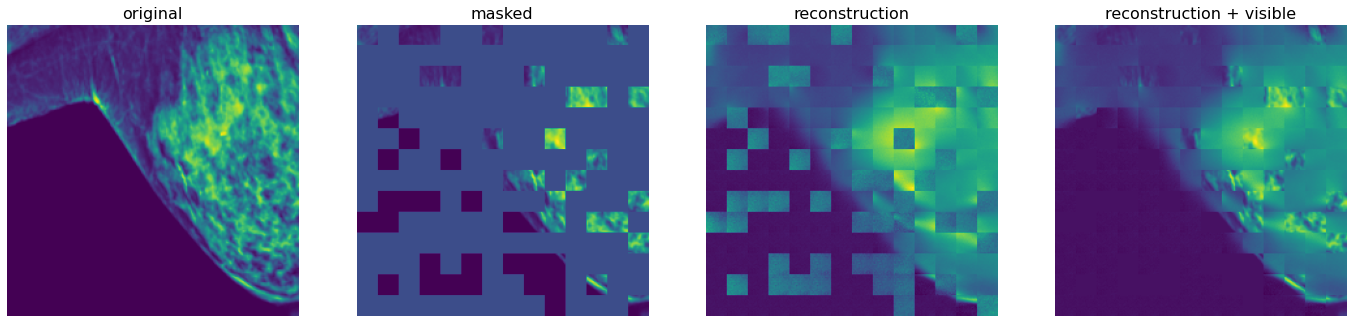

In [12]:
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


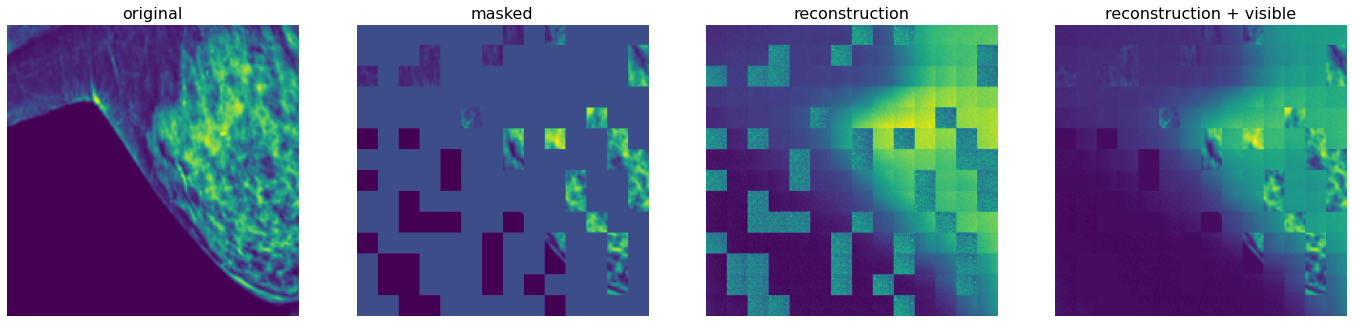

In [10]:
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_234449/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


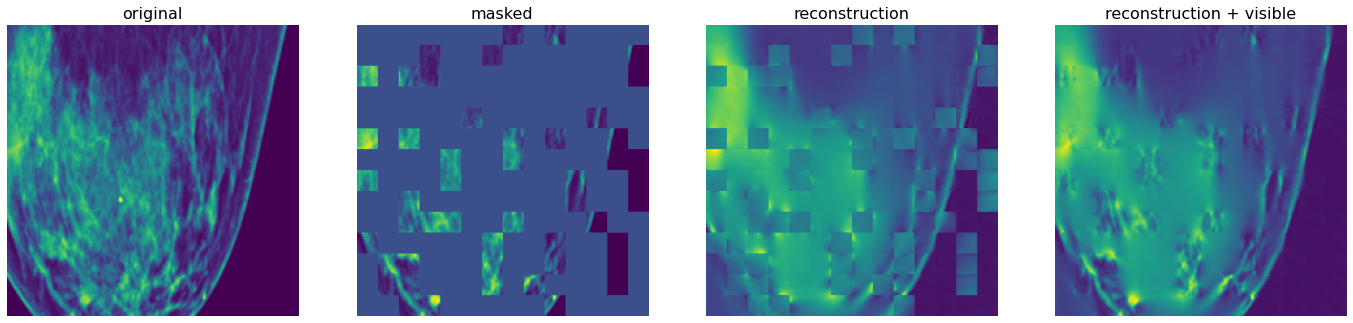

In [9]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_11638/2539584128.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


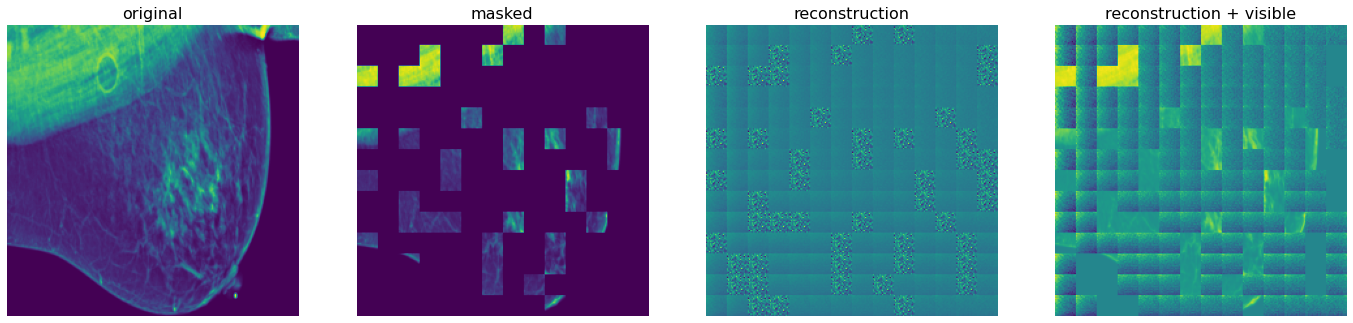

In [38]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

MAE with pixel reconstruction:


/tmp/ipykernel_11638/171479160.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


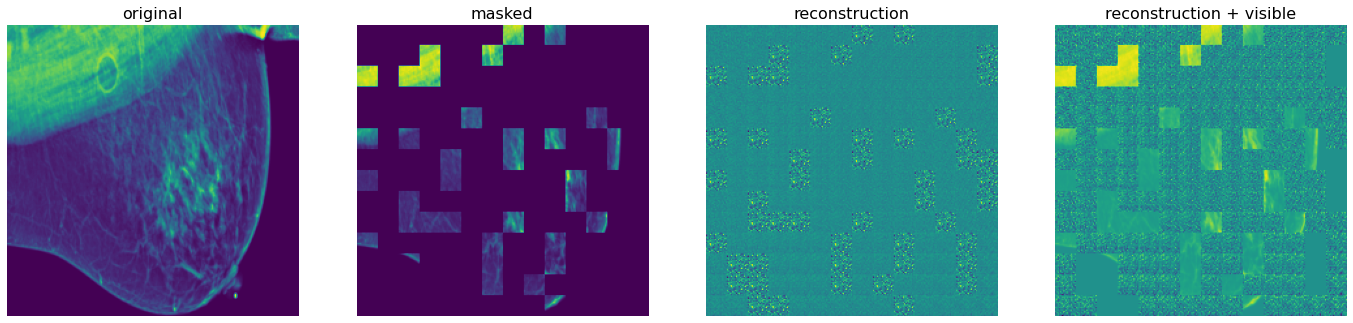

In [20]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(breast, model_mae_grayscale)

In [9]:
chkpt_dir = '/gpfs/data/huo-lab/Image/annawoodard/mae/jobs/36/checkpoint-324.pth'
model_mae_chimec_rgb = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

<All keys matched successfully>
Model loaded.


/tmp/ipykernel_102692/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


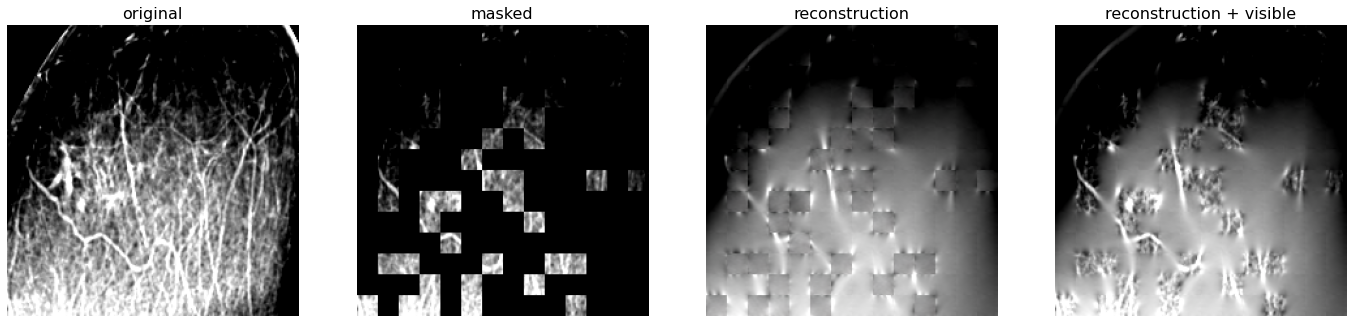

In [10]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


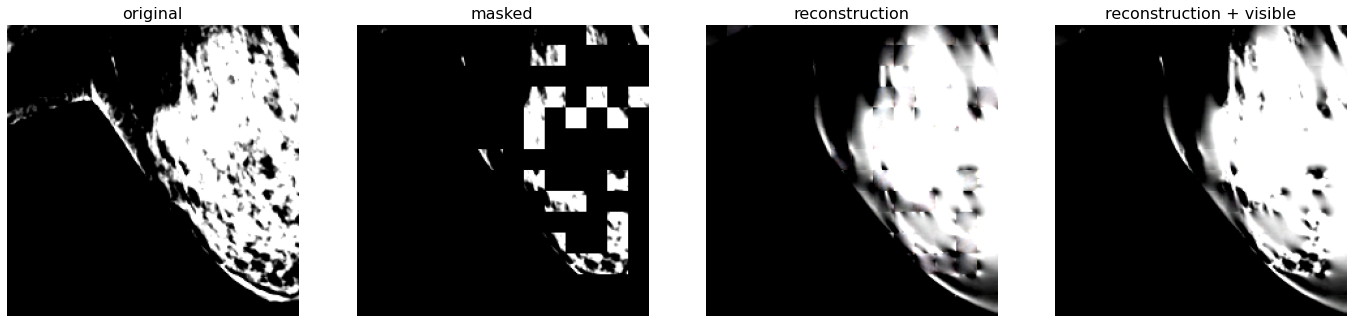

In [24]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


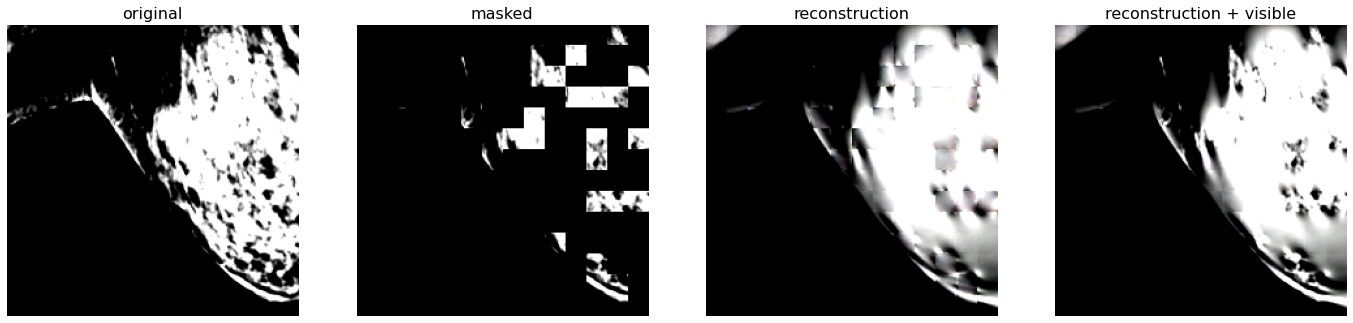

In [18]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


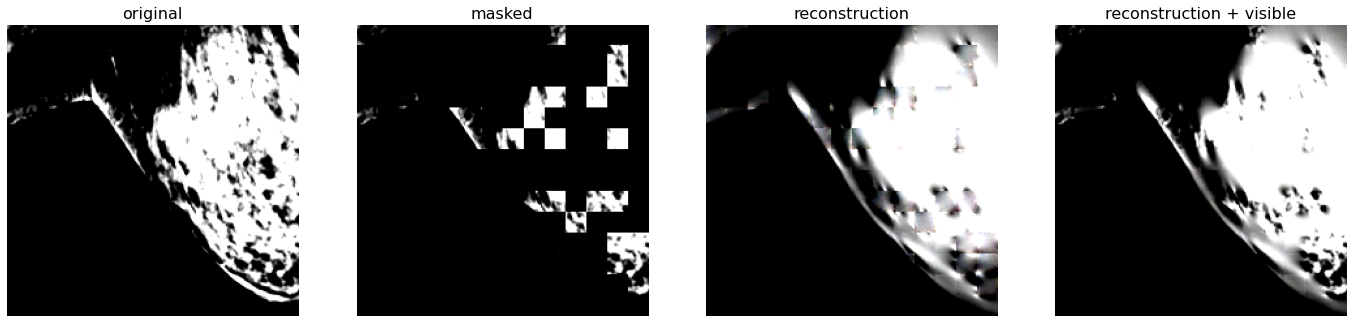

In [14]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

/tmp/ipykernel_241095/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


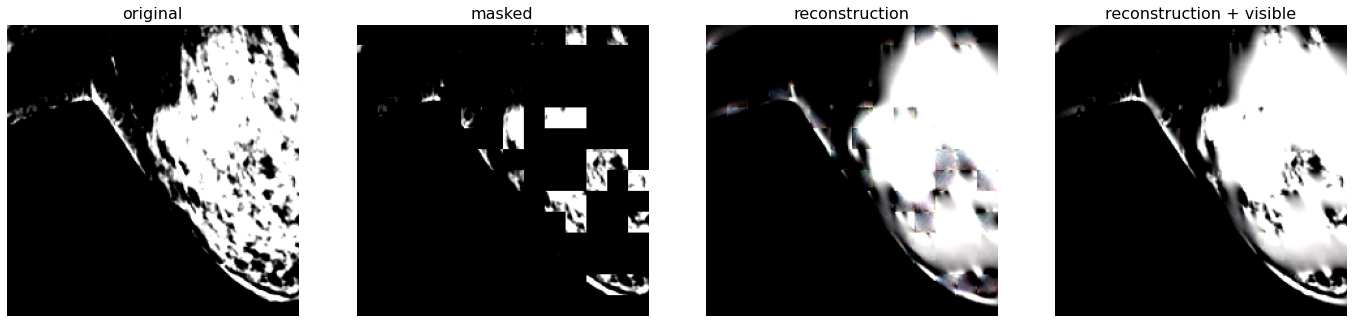

In [8]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

/tmp/ipykernel_234449/2622725618.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


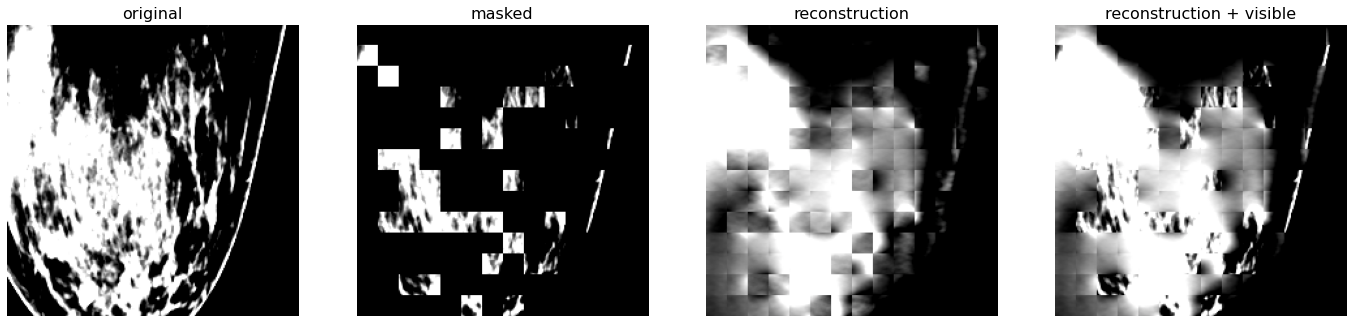

In [7]:
breast_rgb = breast.repeat(1, 1, 3)
run_one_image(breast_rgb, model_mae_chimec_rgb, chimec=True)

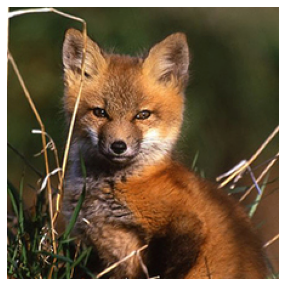

In [22]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
fox = Image.open(requests.get(img_url, stream=True).raw)
fox = fox.resize((224, 224))
fox = np.array(fox) / 255.

assert fox.shape == (224, 224, 3)

# normalize by ImageNet mean and std
fox = fox - imagenet_mean
fox = fox / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(fox))

### Load a pre-trained MAE model

In [23]:
# This is an MAE model trained with pixels as targets for visualization (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large.pth

chkpt_dir = 'mae_visualize_vit_large.pth'
model_mae_rgb = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')


File 'mae_visualize_vit_large.pth' already there; not retrieving.

<All keys matched successfully>
Model loaded.


### Run MAE on the image

MAE with pixel reconstruction:


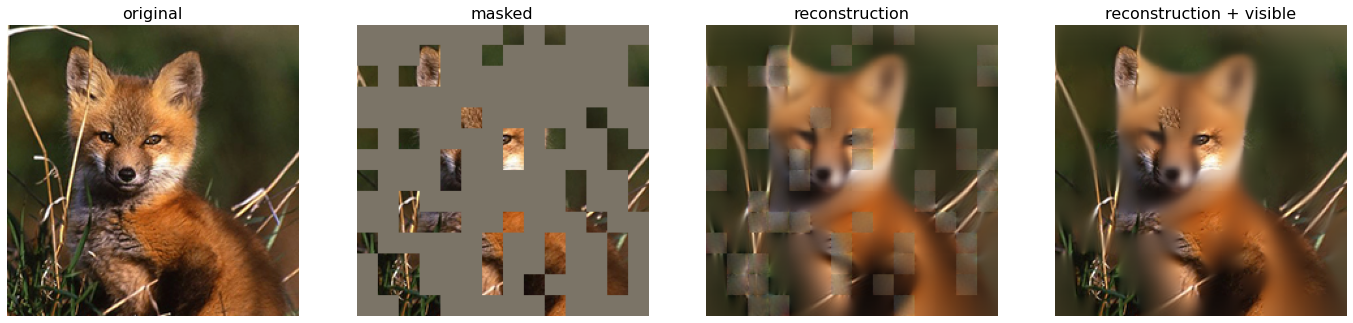

In [43]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(fox, model_mae_rgb, chimec=False)

/tmp/ipykernel_11638/2539584128.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


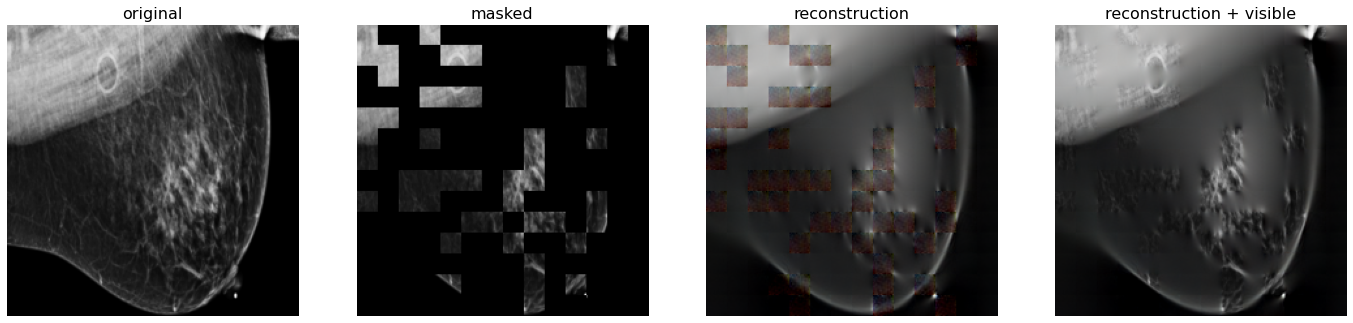

In [46]:
breast_rgb = breast.repeat(1,1,3)
run_one_image(breast_rgb, model_mae_rgb, chimec=True)

### Load another pre-trained MAE model

In [6]:
# This is an MAE model trained with an extra GAN loss for more realistic generation (ViT-Large, training mask ratio=0.75)

# download checkpoint if not exist
!wget -nc https://dl.fbaipublicfiles.com/mae/visualize/mae_visualize_vit_large_ganloss.pth

chkpt_dir = 'mae_visualize_vit_large_ganloss.pth'
model_mae_gan = prepare_model('mae_visualize_vit_large_ganloss.pth', 'mae_vit_large_patch16')
print('Model loaded.')

File ‘mae_visualize_vit_large_ganloss.pth’ already there; not retrieving.

<All keys matched successfully>
Model loaded.


### Run MAE on the image

MAE with extra GAN loss:


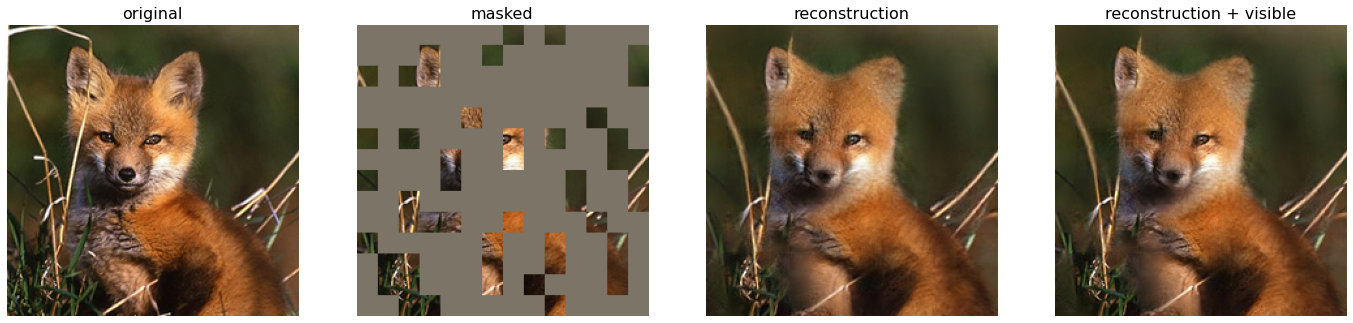

In [7]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with extra GAN loss:')
run_one_image(fox, model_mae_gan)